In [441]:
# 1.Data preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')#importing the dataset
df.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [442]:
df.info() # this gives the features and their types in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [443]:
df[df.duplicated()]   # to check duplicated row 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [444]:
df.columns[df.columns.duplicated()]  # to check duplicated columns


Index([], dtype='object')

In [445]:
df.isnull().sum() # to check the missing values in the dataset , there are no missing values in the dataset,

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [446]:
# renaming the columns
df.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)
df.set_index('ID',inplace=True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [447]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


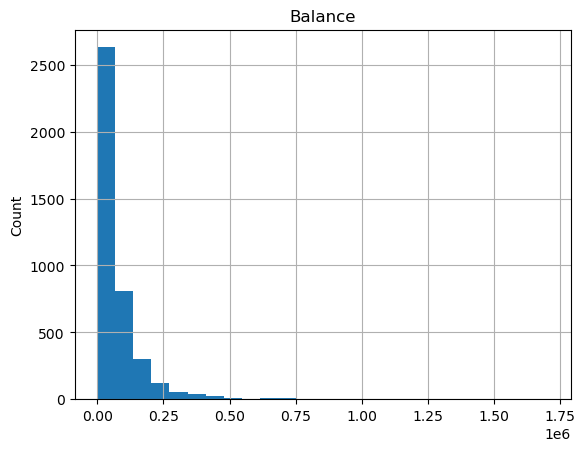

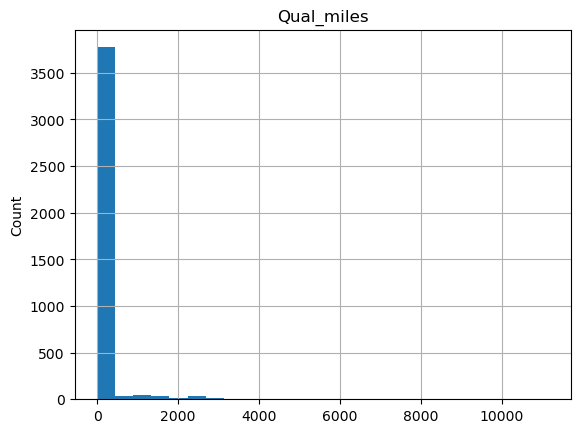

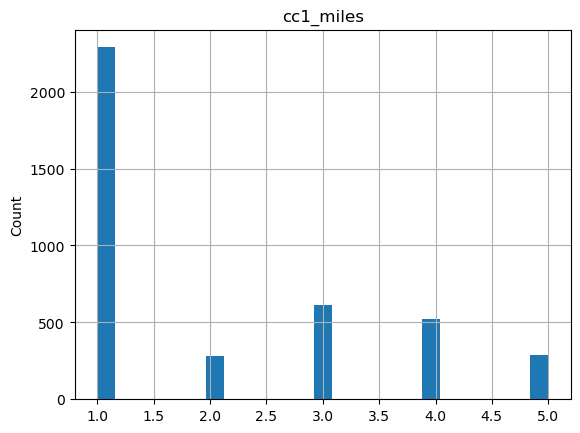

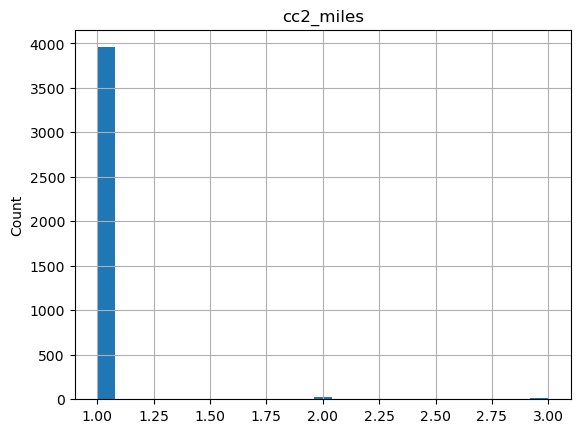

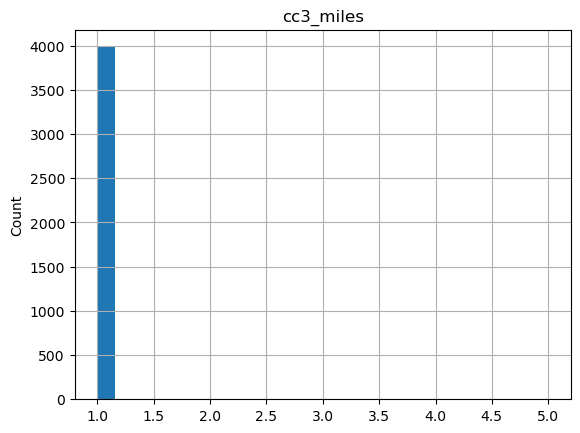

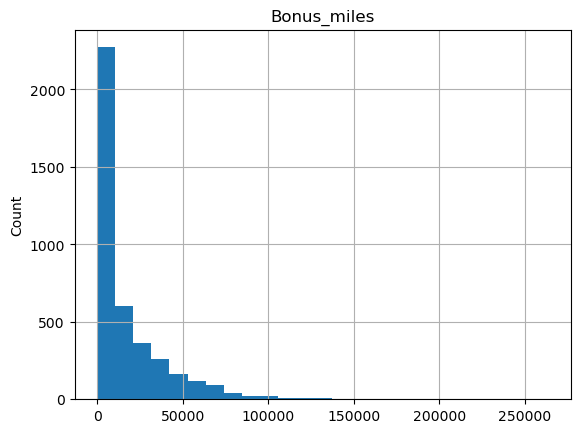

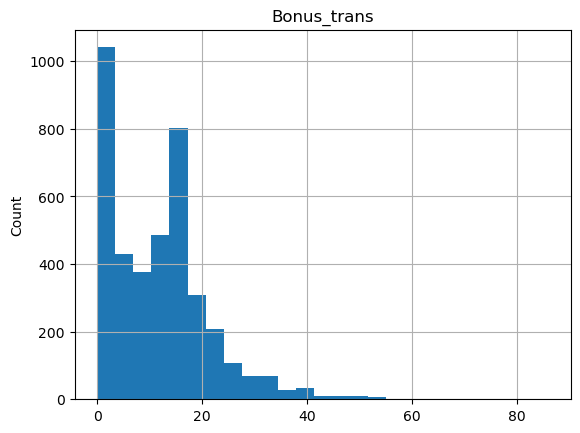

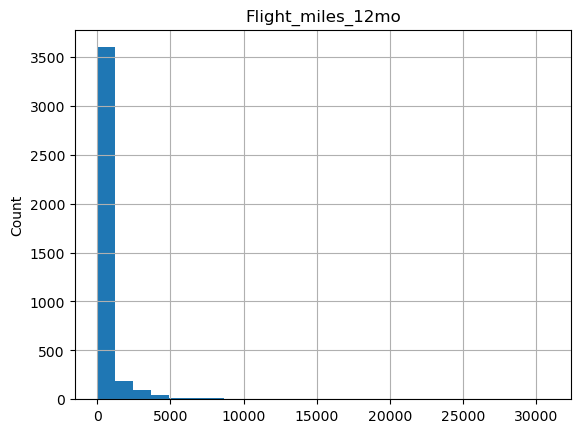

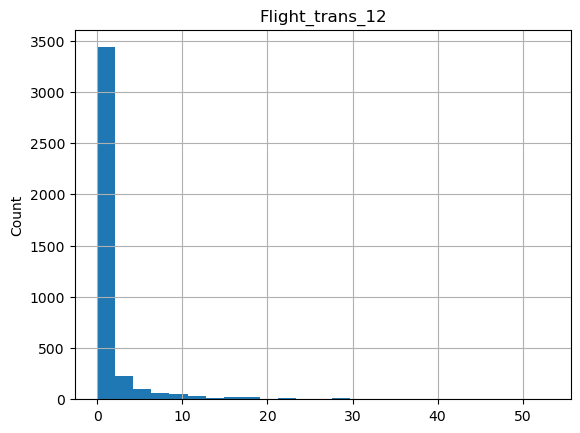

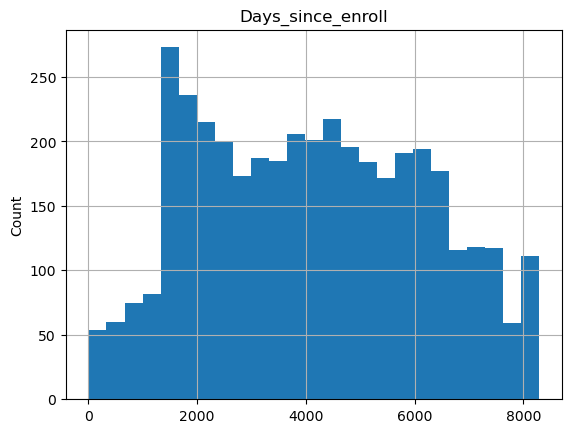

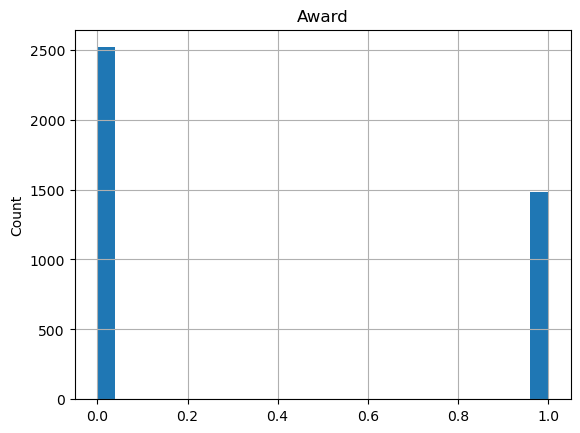

In [451]:
# visualization 
# creating histograms
for col in df.columns:
    df_cleaned = df.copy()
    df_cleaned[col].hist(bins=25)
    plt.ylabel('Count')
    plt.title(col)
    plt.show()

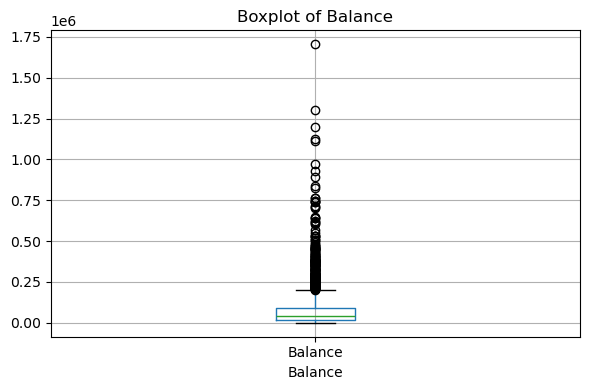

Outliers detected: 266
Lower extreme: -92287.25
Upper extreme: 203218.75


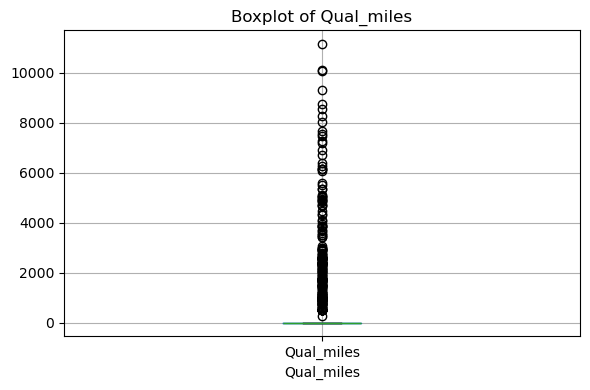

Outliers detected: 226
Lower extreme: 0.0
Upper extreme: 0.0


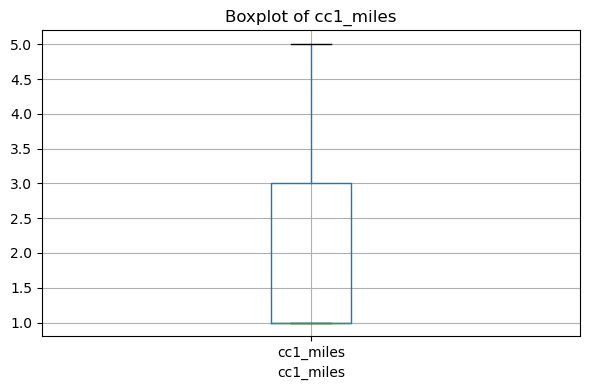

Outliers detected: 0
Lower extreme: -2.0
Upper extreme: 6.0


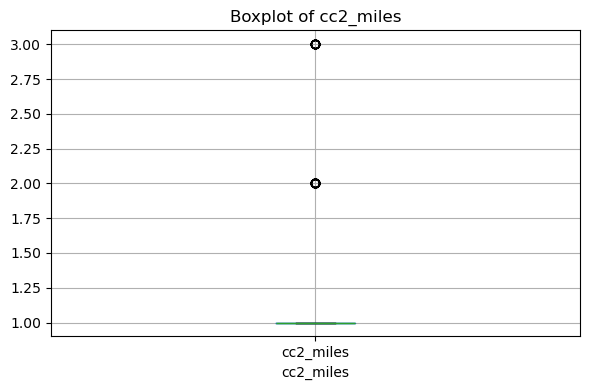

Outliers detected: 43
Lower extreme: 1.0
Upper extreme: 1.0


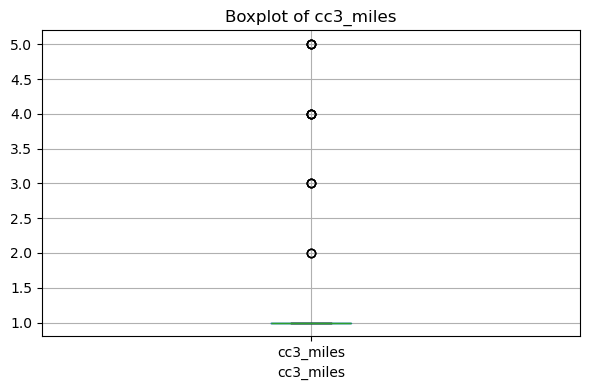

Outliers detected: 18
Lower extreme: 1.0
Upper extreme: 1.0


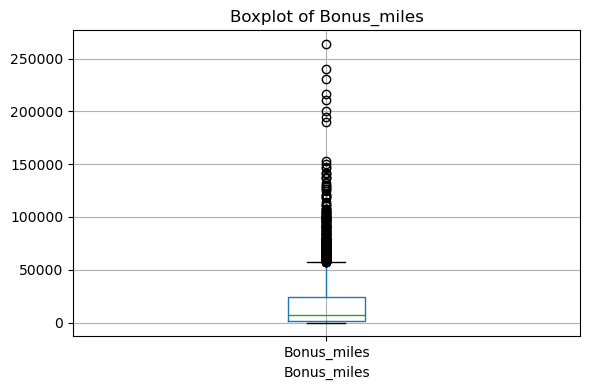

Outliers detected: 280
Lower extreme: -32575.75
Upper extreme: 57626.25


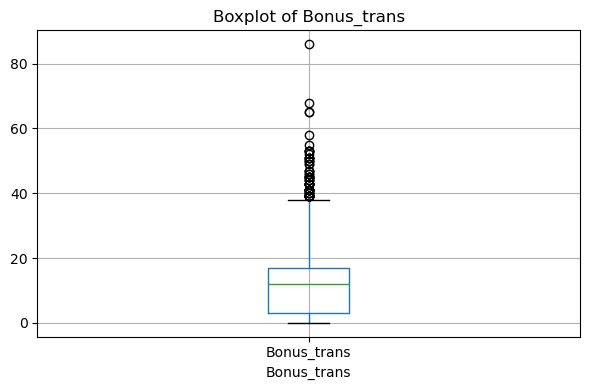

Outliers detected: 63
Lower extreme: -18.0
Upper extreme: 38.0


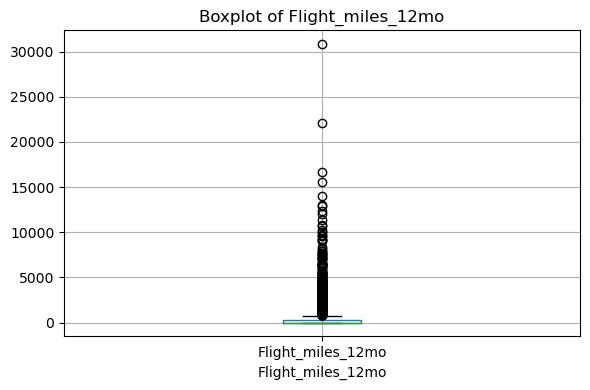

Outliers detected: 569
Lower extreme: -466.5
Upper extreme: 777.5


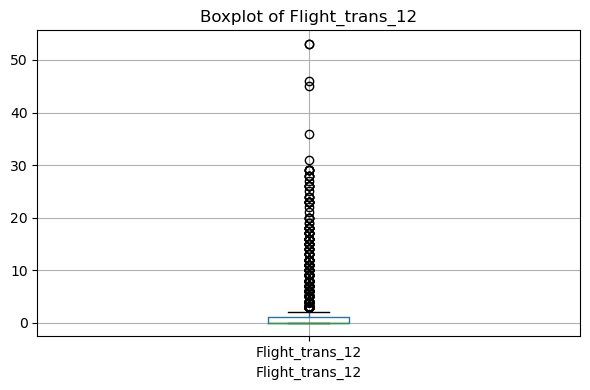

Outliers detected: 565
Lower extreme: -1.5
Upper extreme: 2.5


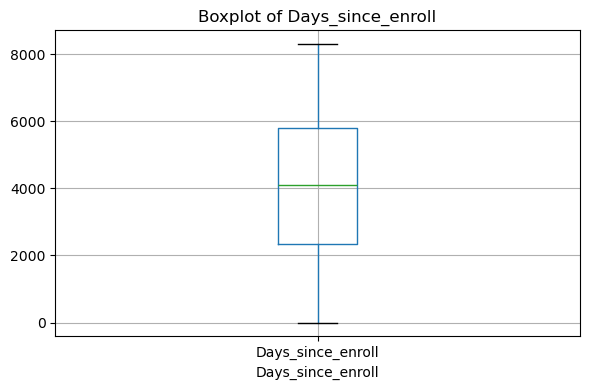

Outliers detected: 0
Lower extreme: -2860.75
Upper extreme: 10981.25


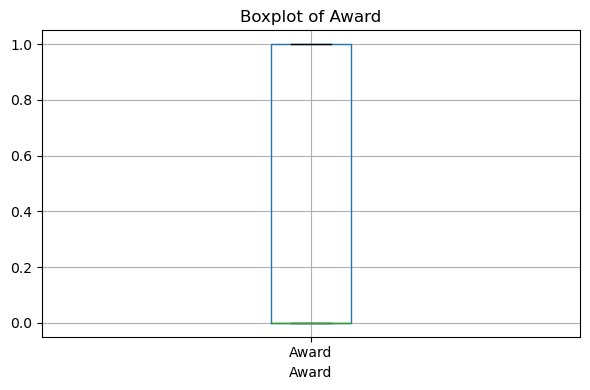

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


In [455]:
# boxplots
for col in df_cleaned:
    series = df_cleaned[col]
  # finding outliers by iqr
    Q1 = series.quantile(0.25) # determining q1
    Q3 = series.quantile(0.75)  # determining q3
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5 * IQR  #deterining lower extreme
    upper_extreme = Q3 + 1.5 * IQR   #deterining upper extreme
    outliers = series[(series < lower_extreme) | (series > upper_extreme)] # determining outliers

    plt.figure(figsize=(6, 4))
    df_cleaned.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    print(f"Outliers detected: {len(outliers)}") #printing no of outliers
    print(f"Lower extreme: {lower_extreme}")
    print(f"Upper extreme: {upper_extreme}")

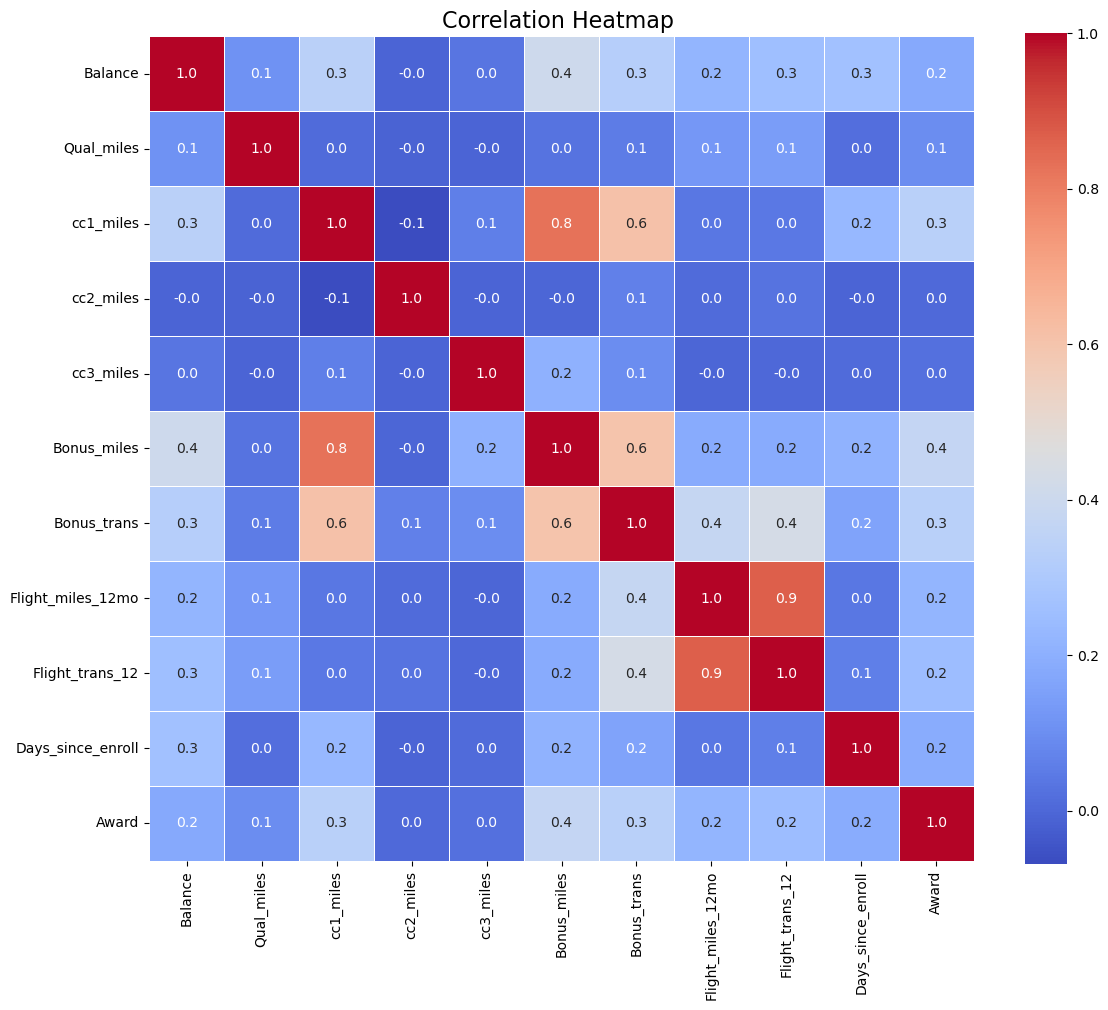

In [457]:
# generating correlation heat maps to explore relationships between pairs of variables.
# Computing the correlation matrix
corr_matrix = df_cleaned.corr()

# Setting  the matplotlib figure
plt.figure(figsize=(12, 10))

# plotting the heatmap with seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title("Correlation Heatmap ", fontsize=16)
plt.tight_layout()
plt.show()

In [458]:
#Normalizing the data
minmax = MinMaxScaler()
norm_data = minmax.fit_transform(df_cleaned)
norm_data.shape

(3999, 11)

In [459]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

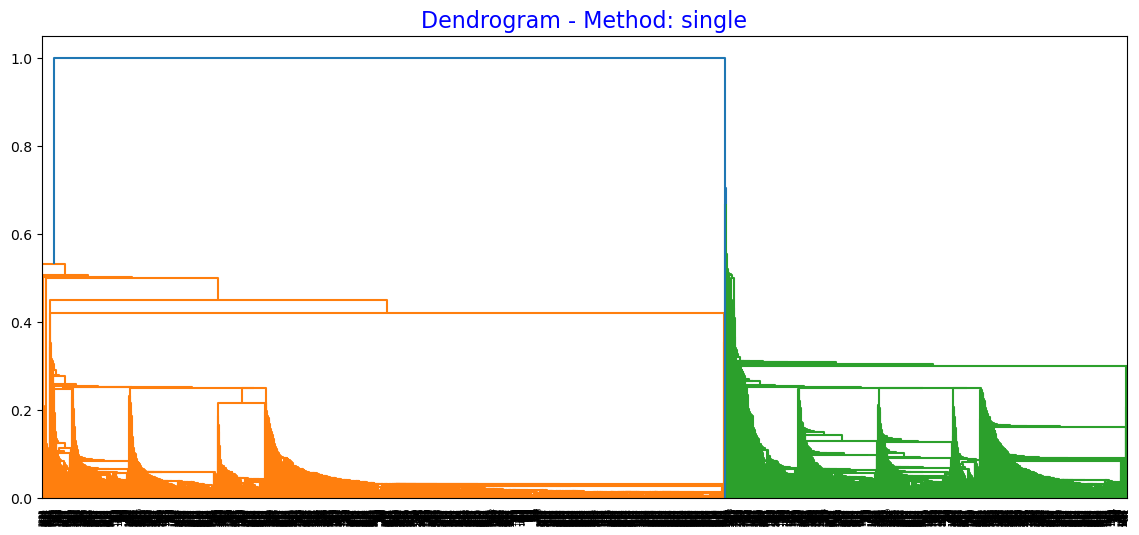

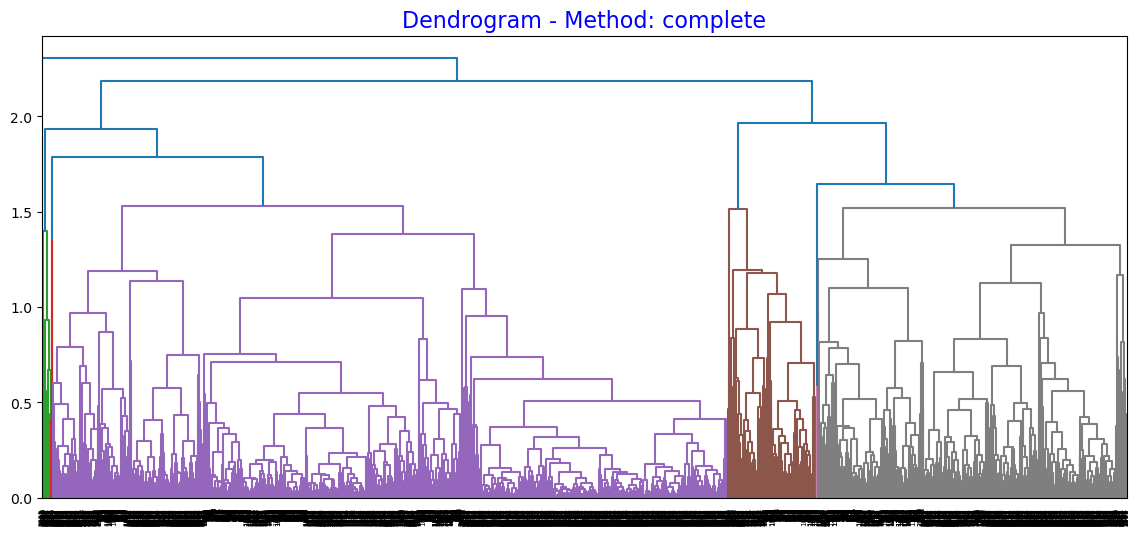

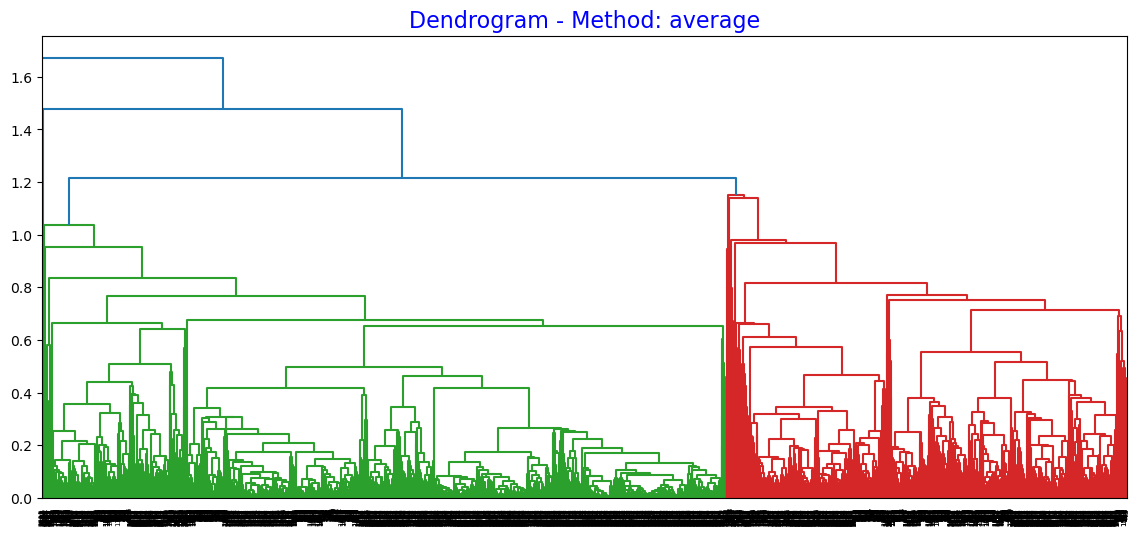

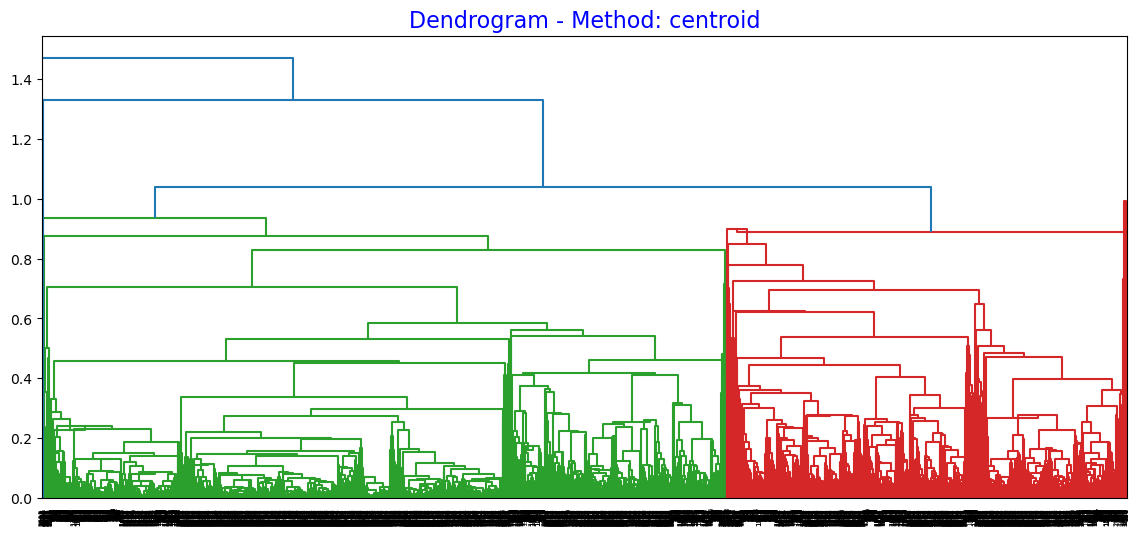

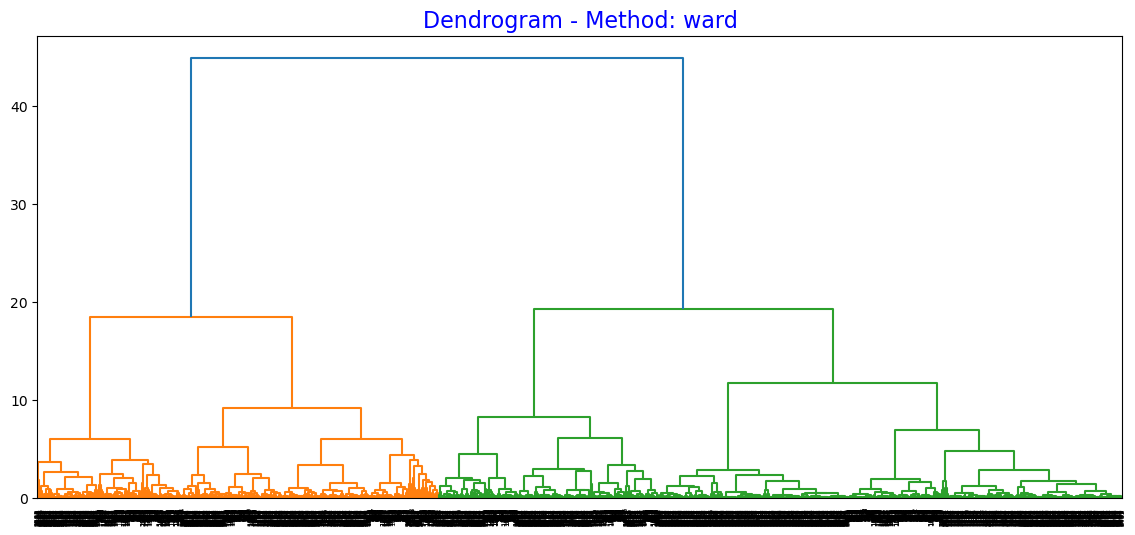

In [460]:
#implementing clustering algorithms 
# hiearchial clustering
#creating dendograms with various linkage methods
methods=['single','complete','average','centroid','ward']
for method in methods:
    plt.figure(figsize =(14,6))       
    plt.title(f'Dendrogram - Method: {method}', fontsize=16, color='blue')
    linkage_matrix = sch.linkage(norm_data, method=method)
    sch.dendrogram(linkage_matrix)
    plt.show()

In [461]:
# checking for best no of clusters using silhouette score.
from sklearn.metrics import silhouette_score
clusters = [2,3,4,5]  
methods=["ward", "complete", "average", "single"]
for cluster in clusters:
    for method in methods:
        hc = AgglomerativeClustering(n_clusters=cluster,linkage = method,metric='euclidean') 
        y_hc = hc.fit_predict(norm_data)
        score = silhouette_score(norm_data, y_hc)
        print(f"For clusters = {cluster}, the silhouette_score with linkage-{method} is: {score}")
    print()

For clusters = 2, the silhouette_score with linkage-ward is: 0.535930510919477
For clusters = 2, the silhouette_score with linkage-complete is: 0.47040913679492186
For clusters = 2, the silhouette_score with linkage-average is: 0.47040913679492186
For clusters = 2, the silhouette_score with linkage-single is: 0.535930510919477

For clusters = 3, the silhouette_score with linkage-ward is: 0.43550164891825044
For clusters = 3, the silhouette_score with linkage-complete is: 0.5318787367232326
For clusters = 3, the silhouette_score with linkage-average is: 0.39619766243707655
For clusters = 3, the silhouette_score with linkage-single is: 0.5351606918177734

For clusters = 4, the silhouette_score with linkage-ward is: 0.42494300944261365
For clusters = 4, the silhouette_score with linkage-complete is: 0.46459708515197673
For clusters = 4, the silhouette_score with linkage-average is: 0.5286018409871408
For clusters = 4, the silhouette_score with linkage-single is: 0.48129679558120275

For c

In [462]:
# from the above analysis n_clusters=2 with linkage=ward thus deploying the model with it
hc1 = AgglomerativeClustering(n_clusters=2,linkage = 'ward',metric='euclidean') 
y_hc1 = hc1.fit_predict(norm_data)
y_hc1

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [463]:
#adding the cluster labels to original dataset
df_cleaned['cluster_id']=hc1.labels_
Cluster=pd.DataFrame(y_hc,columns=['Clusters id'])

In [464]:
df_cleaned

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_id
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,1


In [465]:
#Cluster Analysis and Interpretation:
cluster_summary = df_cleaned.groupby('cluster_id').mean()
cluster_summary

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
cluster_id,,,,,,,,,,,
0,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
1,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0


In [466]:
#This model separates customers into two distinct segments:
# Cluster 0:
# These customers have low balances, fewer bonus miles, and fewer flight miles in the last 12 months.
# Their credit card usage (cc1_miles) and involving in promotions are also on the lower side.
# They appear to be less engaged customers — either new, inactive, or low-value.
# None of them have received an award.

#cluster 1:
# This is a highly engaged customer group.
# They have higher balances, bonus miles,  flight miles.
# Their longer enrollment period and higher credit card usage indicate loyalty and ongoing engagement.
# All customers in this cluster have received awards, showing they benefit from the loyalty program.



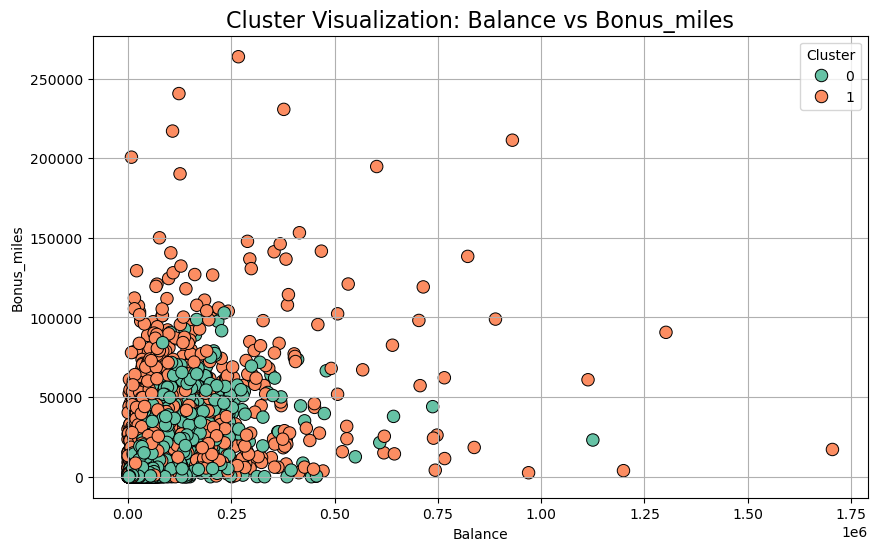

In [467]:
# Visualization:
df_cleaned['cluster_id'] = y_hc1

# Selecting two features for visualization
x_feature = 'Balance'
y_feature = 'Bonus_miles'

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cleaned,
    x=x_feature,
    y=y_feature,
    hue='cluster_id',
    palette='Set2',
    s=80,
    edgecolor='black'
)

plt.title(f"Cluster Visualization: {x_feature} vs {y_feature}", fontsize=16)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()



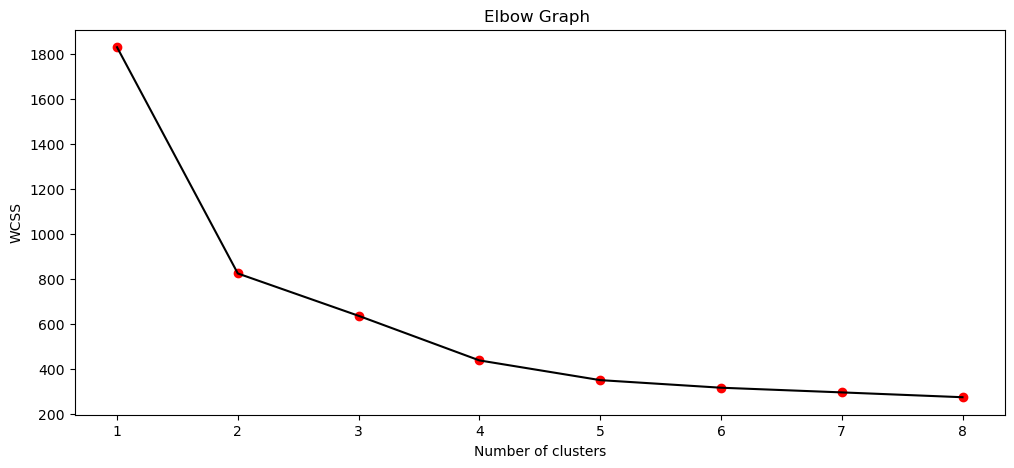

In [468]:
# k-means clustering
# from elbow graph we can choose k value as 2,3,4,5 we will set k value after checking silhouette score
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(norm_data)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(range(1,9), wcss,color = 'black')
plt.scatter(range(1,9), wcss,color='red')
plt.title('Elbow Graph ')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [469]:
#calculating Silhouette score to decide no of clusters ie k value
clust = [2,3,4,5,6,7,8,9]
for n_clusters in clust:
    cluster1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = cluster1.fit_predict(norm_data)
    score1= silhouette_score(norm_data, cluster_labels1)
    print("For n_clusters =", n_clusters,"The silhouette_score is :", score1)

For n_clusters = 2 The silhouette_score is : 0.535930510919477
For n_clusters = 3 The silhouette_score is : 0.5017359816036251
For n_clusters = 4 The silhouette_score is : 0.47483765255961
For n_clusters = 5 The silhouette_score is : 0.43623735714822565
For n_clusters = 6 The silhouette_score is : 0.4328083252009274
For n_clusters = 7 The silhouette_score is : 0.4277185070524272
For n_clusters = 8 The silhouette_score is : 0.35439236290367016
For n_clusters = 9 The silhouette_score is : 0.3415643650710647


In [470]:
# from the above analysis we can choose k value as 2,3,4,5 but we are choosing the no of clusters as 2 because it has the best silhouette score, thus deploying the odel with it.
modelk = KMeans(n_clusters=2)
y_predk = modelk.fit_predict(norm_data)
y_predk.shape

(3999,)

In [471]:
y_predk

array([0, 0, 0, ..., 1, 0, 0])

In [472]:
# adding k cluster results to the original dataset
df_cleaned['kcluster_id']=modelk.labels_
df_cleaned

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_id,kcluster_id
ID,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,1


In [473]:
#Cluster Analysis and Interpretation:
kcluster_summary = df_cleaned.groupby('kcluster_id').mean()
kcluster_summary

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_id
kcluster_id,,,,,,,,,,,,
0,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,0.0
1,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,1.0


In [474]:
# k-means clustering has given same results as hierachial clustering
#This model separates customers into two distinct segments:
# Cluster 0:
# These customers have low balances, fewer bonus miles, and fewer flight miles in the last 12 months.
# Their credit card usage (cc1_miles) and involving in promotions are also on the lower side.
# They appear to be less engaged customers — either new, inactive, or low-value.
# None of them have received an award.

#cluster 1:
# This is a highly engaged customer group.
# They have higher balances, bonus miles,  flight miles.
# Their longer enrollment period and higher credit card usage indicate loyalty and ongoing engagement.
# All customers in this cluster have received awards, showing they benefit from the loyalty program.



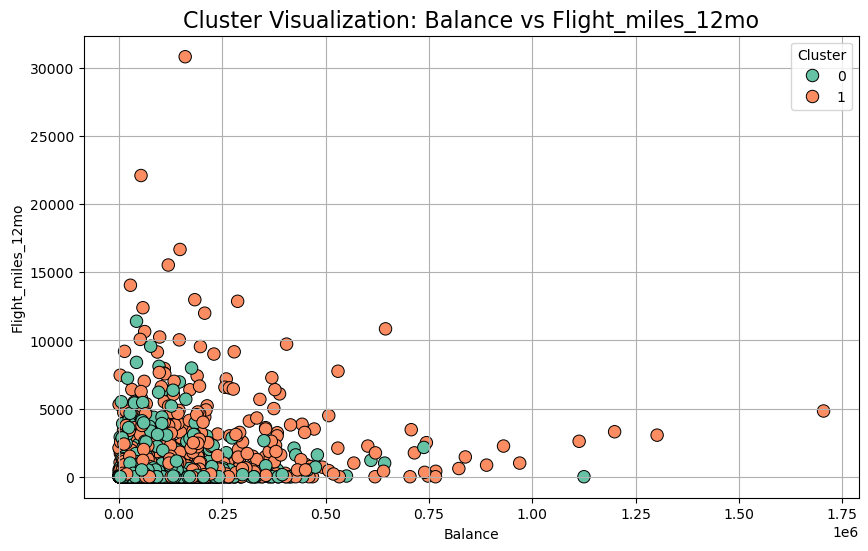

In [475]:
# Visualization:
df_cleaned['kcluster_id'] = y_predk

# Selecting two features for visualization
x_feature = 'Balance'
y_feature = 'Flight_miles_12mo'

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cleaned,
    x=x_feature,
    y=y_feature,
    hue='kcluster_id',
    palette='Set2',
    s=80,
    edgecolor='black'
)

plt.title(f"Cluster Visualization: {x_feature} vs {y_feature}", fontsize=16)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [476]:
# db-scan 
# experimenting with diffrent epsilon, min pts values
from sklearn.cluster import DBSCAN
epsilon = [0.25, 0.5, 0.75, 1]
min_samples = [11,12,13,14,15,16,17,18,19,20,21,22]

for eps in epsilon:
    for min_s in min_samples:
        db = DBSCAN(min_samples=min_s, eps=eps).fit(norm_data)
        labels = db.labels_
        silhouette_avg = silhouette_score(norm_data, labels)
        print(f"eps={eps}, min_samples={min_s}, silhouette score = {silhouette_avg:.4f}")

eps=0.25, min_samples=11, silhouette score = 0.2221
eps=0.25, min_samples=12, silhouette score = 0.2225
eps=0.25, min_samples=13, silhouette score = 0.2198
eps=0.25, min_samples=14, silhouette score = 0.2198
eps=0.25, min_samples=15, silhouette score = 0.2198
eps=0.25, min_samples=16, silhouette score = 0.2198
eps=0.25, min_samples=17, silhouette score = 0.2199
eps=0.25, min_samples=18, silhouette score = 0.2196
eps=0.25, min_samples=19, silhouette score = 0.2194
eps=0.25, min_samples=20, silhouette score = 0.2194
eps=0.25, min_samples=21, silhouette score = 0.2193
eps=0.25, min_samples=22, silhouette score = 0.2191
eps=0.5, min_samples=11, silhouette score = 0.3340
eps=0.5, min_samples=12, silhouette score = 0.3340
eps=0.5, min_samples=13, silhouette score = 0.3336
eps=0.5, min_samples=14, silhouette score = 0.3336
eps=0.5, min_samples=15, silhouette score = 0.3336
eps=0.5, min_samples=16, silhouette score = 0.3336
eps=0.5, min_samples=17, silhouette score = 0.5228
eps=0.5, min_sample

In [478]:
# from the above analysis using epsilon=1 and min_samples=11
modeldb = DBSCAN(eps=1, min_samples=11)
y_preddb=modeldb.fit(norm_data)

In [479]:
y_preddb.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [481]:
# adding db scan cluster results to the original dataset
df_cleaned['dbcluster_id']=y_preddb.labels_
df_cleaned

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_id,kcluster_id,dbcluster_id
ID,,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,1,1


In [482]:
#Cluster Analysis and Interpretation:
dbcluster_summary = df_cleaned.groupby('dbcluster_id').mean()
dbcluster_summary

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_id,kcluster_id
dbcluster_id,,,,,,,,,,,,,
0,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,0.0,0.0
1,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,1.0,1.0


In [483]:
# db-scan  has given same results as hierachial clustering and k-means clusterig.
#This model separates customers into two distinct segments:
# Cluster 0:
# These customers have low balances, fewer bonus miles, and fewer flight miles in the last 12 months.
# Their credit card usage (cc1_miles) and involving in promotions are also on the lower side.
# They appear to be less engaged customers — either new, inactive, or low-value.
# None of them have received an award.

#cluster 1:
# This is a highly engaged customer group.
# They have higher balances, bonus miles,  flight miles.
# Their longer enrollment period and higher credit card usage indicate loyalty and ongoing engagement.
# All customers in this cluster have received awards, showing they benefit from the loyalty program.



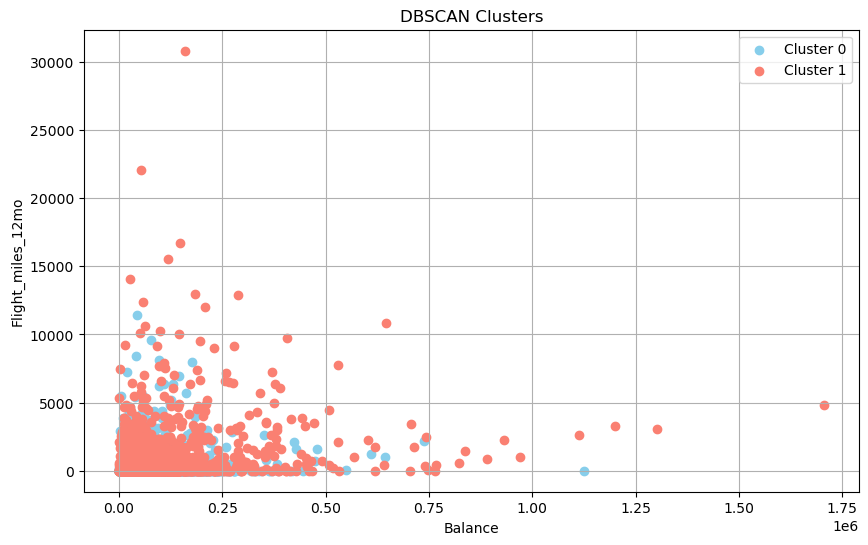

In [523]:
# visualization
plt.figure(figsize=(10, 6))

# Cluster 0
plt.scatter(
    df_cleaned[df_cleaned['dbcluster_id'] == 0]['Balance'],
    df_cleaned[df_cleaned['dbcluster_id'] == 0]['Flight_miles_12mo'],
    c='skyblue',
    label='Cluster 0'
)

# Cluster 1
plt.scatter(
    df_cleaned[df_cleaned['dbcluster_id'] == 1]['Balance'],
    df_cleaned[df_cleaned['dbcluster_id'] == 1]['Flight_miles_12mo'],
    c='salmon',
    label='Cluster 1'
)

# Labels and legend
plt.xlabel('Balance')
plt.ylabel('Flight_miles_12mo')
plt.title('DBSCAN Clusters')
plt.legend()
plt.grid(True)
plt.show()